In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import csv

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [12]:
conn = sqlite3.connect('../db.sqlite3')
cursor = conn.cursor()
query = "SELECT restaurant_product.price, restaurant_product.name, restaurant_orderitem.quantity, restaurant_order.datetime FROM restaurant_order JOIN restaurant_orderitem ON restaurant_order.id = restaurant_orderitem.order_id JOIN restaurant_product ON restaurant_product.id = restaurant_orderitem.product_id;"
cursor.execute(query)
results = cursor.fetchall()

csv_file = 'db.csv'
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    header_row = ['product_price', 'product_name', 'quantity', 'datetime']
    writer.writerow(header_row)
    for row in results:
        writer.writerow(row)

conn.close()
df = pd.read_csv('db.csv')

,product_price,product_name,quantity,datetime
0,0.80,Plain Papadum,2,2019-08-03 20:25:00
1,12.95,King Prawn Balti,1,2019-08-03 20:25:00
2,2.95,Garlic Naan,1,2019-08-03 20:25:00
3,3.95,Mushroom Rice,1,2019-08-03 20:25:00
4,8.95,Paneer Tikka Masala,1,2019-08-03 20:25:00
...,...,...,...,...
74813,17.95,House Red wine 75cl,2,2016-05-18 18:53:00
74814,17.95,House Red wine 75cl,2,2016-05-14 19:28:00
74815,17.95,House Red wine 75cl,2,2016-05-10 13:18:00
74816,17.95,House white wine 75cl,1,2016-04-07 19:04:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

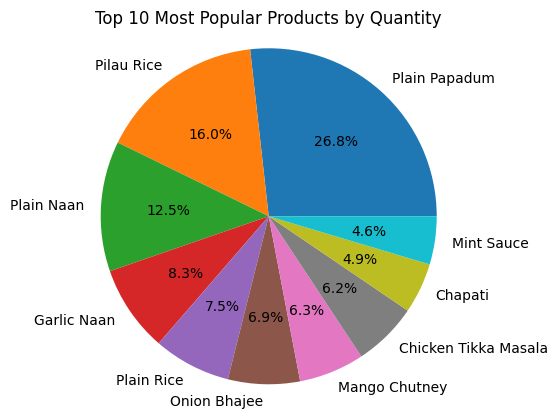

In [33]:
product_sales = df.groupby('product_name')['quantity'].sum()
top_10_products = product_sales.nlargest(10)
total_quantity = top_10_products.sum()
percentages = (top_10_products / total_quantity) * 100
plt.pie(percentages, labels=top_10_products.index, autopct='%.1f%%')
plt.axis('equal')
plt.title('Top 10 Most Popular Products by Quantity')
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

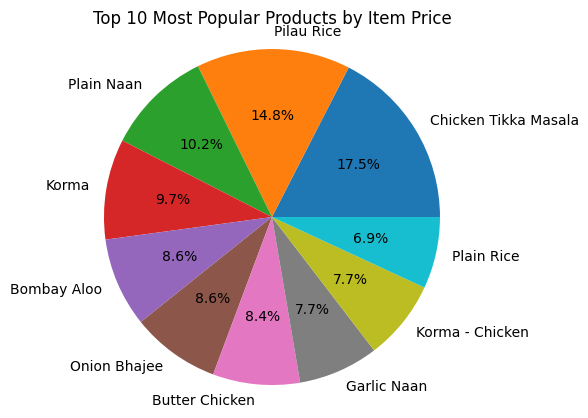

In [34]:
df['item_price'] = df['product_price'] * df['quantity']
product_sales = df.groupby('product_name')['item_price'].sum()
top_10_products = product_sales.nlargest(10)
total_price = top_10_products.sum()
percentages = (top_10_products / total_price) * 100
plt.pie(percentages, labels=top_10_products.index, autopct='%.1f%%')
plt.axis('equal')
plt.title('Top 10 Most Popular Products by Item Price')
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

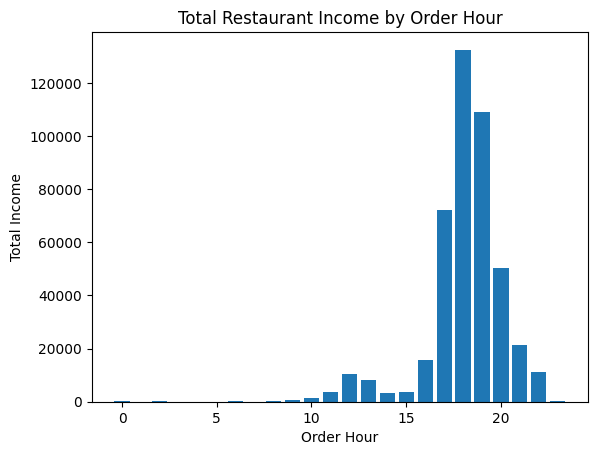

In [35]:
df['Order Hour'] = pd.to_datetime(df['datetime']).dt.hour
hourly_income = df.groupby('Order Hour')['item_price'].sum()
plt.bar(hourly_income.index, hourly_income)
plt.xlabel('Order Hour')
plt.ylabel('Total Income')
plt.title('Total Restaurant Income by Order Hour')
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

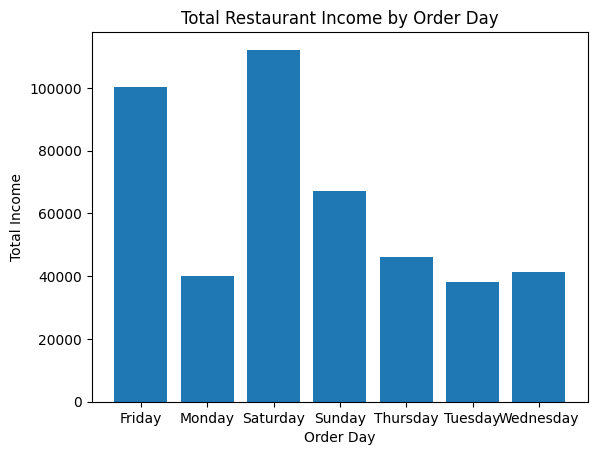

In [36]:
df['Order Day'] = pd.to_datetime(df['datetime']).dt.dayofweek
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Order Day'] = df['Order Day'].map(lambda x: day_names[x])
daily_income = df.groupby('Order Day')['item_price'].sum()
plt.bar(daily_income.index, daily_income)
plt.xlabel('Order Day')
plt.ylabel('Total Income')
plt.title('Total Restaurant Income by Order Day')
plt.show()